In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.optimize as sco
import numpy.random as npr

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Step One

In [2]:
xls = pd.ExcelFile('HW3_20190414.xlsx')
FX_prices = pd.read_excel(xls, 'FX_Prices')

In [3]:
FX_prices

,Euro,Unnamed: 1,Unnamed: 2,British Pound,Unnamed: 4,Unnamed: 5,Japanese Yen,Unnamed: 7,Unnamed: 8,Australian Dollar,Unnamed: 10,Unnamed: 11,Canadian Dollar,Unnamed: 13,Unnamed: 14,Norwegian Krone,Unnamed: 16,Unnamed: 17,Swiss Franc,Unnamed: 19
0,Dates,EURUSD,NaN,Dates,GBPUSD,NaN,Dates,JPYUSD,NaN,Dates,AUDUSD,NaN,Dates,CADUSD,NaN,Dates,NOKUSD,NaN,Dates,CHFUSD
1,2019-03-29 00:00:00,1.1254,NaN,2019-03-29 00:00:00,1.3182,NaN,2019-03-29 00:00:00,0.009077,NaN,2019-03-29 00:00:00,0.709,NaN,2019-03-29 00:00:00,0.7456,NaN,2019-03-29 00:00:00,0.1159,NaN,2019-03-29 00:00:00,1.005
2,2019-02-28 00:00:00,1.1371,NaN,2019-02-28 00:00:00,1.3263,NaN,2019-02-28 00:00:00,0.008978,NaN,2019-02-28 00:00:00,0.7094,NaN,2019-02-28 00:00:00,0.7589,NaN,2019-02-28 00:00:00,0.1168,NaN,2019-02-28 00:00:00,1.002
3,2019-01-31 00:00:00,1.1448,NaN,2019-01-31 00:00:00,1.3109,NaN,2019-01-31 00:00:00,0.009186,NaN,2019-01-31 00:00:00,0.7273,NaN,2019-01-31 00:00:00,0.7619,NaN,2019-01-31 00:00:00,0.1186,NaN,2019-01-31 00:00:00,1.0057
4,2018-12-31 00:00:00,1.1467,NaN,2018-12-31 00:00:00,1.2754,NaN,2018-12-31 00:00:00,0.009123,NaN,2018-12-31 00:00:00,0.7049,NaN,2018-12-31 00:00:00,0.7332,NaN,2018-12-31 00:00:00,0.1157,NaN,2018-12-31 00:00:00,1.0187
5,2018-11-30 00:00:00,1.1317,NaN,2018-11-30 00:00:00,1.2749,NaN,2018-11-30 00:00:00,0.008812,NaN,2018-11-30 00:00:00,0.7306,NaN,2018-11-30 00:00:00,0.7523,NaN,2018-11-30 00:00:00,0.1163,NaN,2018-11-30 00:00:00,1.0015
6,2018-10-31 00:00:00,1.1312,NaN,2018-10-31 00:00:00,1.2766,NaN,2018-10-31 00:00:00,0.008853,NaN,2018-10-31 00:00:00,0.7073,NaN,2018-10-31 00:00:00,0.76,NaN,2018-10-31 00:00:00,0.1185,NaN,2018-10-31 00:00:00,0.9917
7,2018-09-28 00:00:00,1.1604,NaN,2018-09-28 00:00:00,1.3031,NaN,2018-09-28 00:00:00,0.008796,NaN,2018-09-28 00:00:00,0.7224,NaN,2018-09-28 00:00:00,0.7746,NaN,2018-09-28 00:00:00,0.1227,NaN,2018-09-28 00:00:00,1.0186
8,2018-08-31 00:00:00,1.1602,NaN,2018-08-31 00:00:00,1.296,NaN,2018-08-31 00:00:00,0.009005,NaN,2018-08-31 00:00:00,0.7189,NaN,2018-08-31 00:00:00,0.7667,NaN,2018-08-31 00:00:00,0.1192,NaN,2018-08-31 00:00:00,1.0321
9,2018-07-31 00:00:00,1.1691,NaN,2018-07-31 00:00:00,1.3124,NaN,2018-07-31 00:00:00,0.008939,NaN,2018-07-31 00:00:00,0.7424,NaN,2018-07-31 00:00:00,0.7688,NaN,2018-07-31 00:00:00,0.1226,NaN,2018-07-31 00:00:00,1.0097


In [4]:
for i in range(len(FX_prices.columns)):
    FX_prices = FX_prices.rename(index=str, columns={FX_prices.columns[i]:FX_prices.iloc[0][i]})
FX_prices = FX_prices[1:]

In [5]:
FX_prices.head()

,Dates,EURUSD,nan,Dates,GBPUSD,nan,Dates,JPYUSD,nan,Dates,AUDUSD,nan,Dates,CADUSD,nan,Dates,NOKUSD,nan,Dates,CHFUSD
1,2019-03-29 00:00:00,1.1254,NaN,2019-03-29 00:00:00,1.3182,NaN,2019-03-29 00:00:00,0.009077,NaN,2019-03-29 00:00:00,0.709,NaN,2019-03-29 00:00:00,0.7456,NaN,2019-03-29 00:00:00,0.1159,NaN,2019-03-29 00:00:00,1.005
2,2019-02-28 00:00:00,1.1371,NaN,2019-02-28 00:00:00,1.3263,NaN,2019-02-28 00:00:00,0.008978,NaN,2019-02-28 00:00:00,0.7094,NaN,2019-02-28 00:00:00,0.7589,NaN,2019-02-28 00:00:00,0.1168,NaN,2019-02-28 00:00:00,1.002
3,2019-01-31 00:00:00,1.1448,NaN,2019-01-31 00:00:00,1.3109,NaN,2019-01-31 00:00:00,0.009186,NaN,2019-01-31 00:00:00,0.7273,NaN,2019-01-31 00:00:00,0.7619,NaN,2019-01-31 00:00:00,0.1186,NaN,2019-01-31 00:00:00,1.0057
4,2018-12-31 00:00:00,1.1467,NaN,2018-12-31 00:00:00,1.2754,NaN,2018-12-31 00:00:00,0.009123,NaN,2018-12-31 00:00:00,0.7049,NaN,2018-12-31 00:00:00,0.7332,NaN,2018-12-31 00:00:00,0.1157,NaN,2018-12-31 00:00:00,1.0187
5,2018-11-30 00:00:00,1.1317,NaN,2018-11-30 00:00:00,1.2749,NaN,2018-11-30 00:00:00,0.008812,NaN,2018-11-30 00:00:00,0.7306,NaN,2018-11-30 00:00:00,0.7523,NaN,2018-11-30 00:00:00,0.1163,NaN,2018-11-30 00:00:00,1.0015


In [6]:
FX_prices = FX_prices.loc[:,~FX_prices.columns.duplicated()]
FX_prices.dropna(axis=1, inplace=True)
FX_prices.head()

,Dates,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
1,2019-03-29 00:00:00,1.1254,1.3182,0.009077,0.709,0.7456,0.1159,1.005
2,2019-02-28 00:00:00,1.1371,1.3263,0.008978,0.7094,0.7589,0.1168,1.002
3,2019-01-31 00:00:00,1.1448,1.3109,0.009186,0.7273,0.7619,0.1186,1.0057
4,2018-12-31 00:00:00,1.1467,1.2754,0.009123,0.7049,0.7332,0.1157,1.0187
5,2018-11-30 00:00:00,1.1317,1.2749,0.008812,0.7306,0.7523,0.1163,1.0015


In [7]:
FX_prices.set_index('Dates', inplace=True)

In [8]:
FX_prices.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2019-03-29,1.1254,1.3182,0.009077,0.709,0.7456,0.1159,1.005
2019-02-28,1.1371,1.3263,0.008978,0.7094,0.7589,0.1168,1.002
2019-01-31,1.1448,1.3109,0.009186,0.7273,0.7619,0.1186,1.0057
2018-12-31,1.1467,1.2754,0.009123,0.7049,0.7332,0.1157,1.0187
2018-11-30,1.1317,1.2749,0.008812,0.7306,0.7523,0.1163,1.0015


In [9]:
FX_prices = FX_prices.sort_index(axis=0, ascending=True)
FX_prices.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-04-29,1.184,1.5185,0.009833,0.7155,0.7231,0.1395,0.7125
1994-05-31,1.1909,1.5113,0.009544,0.7371,0.7225,0.14,0.713
1994-06-30,1.2238,1.5443,0.010158,0.7285,0.7224,0.1444,0.7499
1994-07-29,1.2261,1.544,0.009985,0.7395,0.7211,0.1448,0.7463
1994-08-31,1.2341,1.534,0.009995,0.7429,0.731,0.1442,0.7508


### Transform currency prices to monthly returns

In [10]:
FX_ret = pd.DataFrame()
for name in FX_prices.columns:
    FX_ret[name + '_ret'] = FX_prices[name].pct_change()

In [11]:
FX_ret.head()

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
Dates,,,,,,,
1994-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-05-31,0.005828,-0.004742,-0.029391,0.030189,-0.000830,0.003584,0.000702
1994-06-30,0.027626,0.021836,0.064334,-0.011667,-0.000138,0.031429,0.051753
1994-07-29,0.001879,-0.000194,-0.017031,0.015100,-0.001800,0.002770,-0.004801
1994-08-31,0.006525,-0.006477,0.001002,0.004598,0.013729,-0.004144,0.006030


In [12]:
FX_ret.tail()

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
Dates,,,,,,,
2018-11-30,0.000442,-0.001332,-0.004631,0.032942,-0.010132,-0.018565,0.009882
2018-12-31,0.013254,0.000392,0.035293,-0.035177,-0.025389,-0.005159,0.017174
2019-01-31,-0.001657,0.027834,0.006906,0.031778,0.039143,0.025065,-0.012761
2019-02-28,-0.006726,0.011748,-0.022643,-0.024612,-0.003938,-0.015177,-0.003679
2019-03-29,-0.010289,-0.006107,0.011027,-0.000564,-0.017525,-0.007705,0.002994


# Step Two

## Model Selection Method A (In-Sample)

In [13]:
testdataA = FX_ret.loc['1998-01-30':]    #staring from 1999-12-31, use past 24 month
testdataA.index = pd.DatetimeIndex(testdataA.index.values, freq=testdataA.index.inferred_freq)

In [14]:
def method_A(Data, name):
    '''This method take a parameter which is the name of the currency and do the forecasting
    '''
    result = pd.DataFrame(data=Data[name])
    result['AIC_AR1'] = np.NaN
    result['AIC_MA1'] = np.NaN
    result['forecast'] = np.NaN
    result['sign'] = 0
    for t in range(23,len(result[name])-1):    #start at 1999-12-31
        past24 = result.iloc[(t-23):(t+1)][name]   #past 24 month return
        AR_model = ARIMA(past24, order=(1,0,0))     
        AR_model_fit = AR_model.fit(disp=0)
        MA_model = ARIMA(past24, order=(0,0,1))
        MA_model_fit = MA_model.fit(disp=0)

        result['AIC_AR1'].iloc[t] = AR_model_fit.aic      #calculate the aic
        result['AIC_MA1'].iloc[t] = MA_model_fit.aic

        if AR_model_fit.aic < MA_model_fit.aic:    #choose the model with the lower aic to do the forecasting
            yhat_AR = AR_model_fit.forecast()[0]
            result['forecast'].iloc[t+1] = yhat_AR
        else:
            yhat_MA = MA_model_fit.forecast()[0]
            result['forecast'].iloc[t+1] = yhat_MA
        
    result['sign'].loc[result['forecast'] < 0] = -1     
    result['sign'].loc[result['forecast'] > 0] = 1
    return result

In [15]:
print(method_A(testdataA, 'EURUSD_ret'))


/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

            EURUSD_ret     AIC_AR1     AIC_MA1  forecast  sign
1998-01-30   -0.018425         NaN         NaN       NaN     0
1998-02-27    0.007097         NaN         NaN       NaN     0
1998-03-31   -0.018082         NaN         NaN       NaN     0
1998-04-30    0.029937         NaN         NaN       NaN     0
1998-05-29    0.006969         NaN         NaN       NaN     0
1998-06-30   -0.011929         NaN         NaN       NaN     0
1998-07-31    0.014100         NaN         NaN       NaN     0
1998-08-31    0.001545         NaN         NaN       NaN     0
1998-09-30    0.062154         NaN         NaN       NaN     0
1998-10-30    0.009055         NaN         NaN       NaN     0
1998-11-30   -0.020911         NaN         NaN       NaN     0
1998-12-31    0.014786         NaN         NaN       NaN     0
1999-01-29   -0.031868         NaN         NaN       NaN     0
1999-02-26   -0.029308         NaN         NaN       NaN     0
1999-03-31   -0.024209         NaN         NaN       Na

In [16]:
testdataA.columns

Index(['EURUSD_ret', 'GBPUSD_ret', 'JPYUSD_ret', 'AUDUSD_ret', 'CADUSD_ret',
       'NOKUSD_ret', 'CHFUSD_ret'],
      dtype='object')

In [17]:
EUR_A = method_A(testdataA, 'EURUSD_ret')[['EURUSD_ret','forecast', 'sign']]
GBP_A = method_A(testdataA, 'GBPUSD_ret')[['GBPUSD_ret','forecast', 'sign']]
JPY_A = method_A(testdataA, 'JPYUSD_ret')[['JPYUSD_ret','forecast', 'sign']]
AUD_A = method_A(testdataA, 'AUDUSD_ret')[['AUDUSD_ret','forecast', 'sign']]
CAD_A = method_A(testdataA, 'CADUSD_ret')[['CADUSD_ret','forecast', 'sign']]
NOK_A = method_A(testdataA, 'NOKUSD_ret')[['NOKUSD_ret','forecast', 'sign']]
CHF_A = method_A(testdataA, 'CHFUSD_ret')[['CHFUSD_ret','forecast', 'sign']]
    

/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [18]:
sign_table_A = pd.concat([EUR_A['sign'], GBP_A['sign'],JPY_A['sign'] ,
                        AUD_A['sign'] ,CAD_A['sign'] ,NOK_A['sign'], CHF_A['sign']], axis=1)

In [19]:
sign_table_A = sign_table_A.loc['2000-01-31':]
sign_table_A.head()
#sign table start from 2000-01-31; order is EUR GBP JPY AUD CAD NOK CHF 

,sign,sign,sign,sign,sign,sign,sign
2000-01-31,-1,-1,1,-1,-1,1,-1
2000-02-29,-1,-1,1,-1,1,1,-1
2000-03-31,-1,1,1,-1,-1,1,-1
2000-04-28,-1,-1,-1,-1,-1,-1,-1
2000-05-31,-1,1,1,-1,1,1,-1


In [20]:
return_table_A = FX_ret.loc['2000-01-30':]
return_table_A

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
Dates,,,,,,,
2000-01-31,-0.035281,-0.001236,-0.045310,-0.029998,-0.001157,-0.036889,-0.040401
2000-02-29,-0.006696,-0.022893,-0.026415,-0.030141,-0.001593,-0.007494,-0.004641
2000-03-31,-0.009023,0.007535,0.072902,-0.017320,0.000870,-0.009228,0.000000
2000-04-28,-0.045631,-0.025014,-0.049856,-0.038214,-0.021008,-0.053345,-0.029642
2000-05-31,0.028622,-0.032167,0.004977,-0.019524,-0.011100,0.006261,0.021452
2000-06-30,0.015458,0.008459,0.015825,0.043493,0.010925,0.035556,0.029066
2000-07-31,-0.027192,-0.009511,-0.031369,-0.027787,-0.004293,-0.030901,-0.022204
2000-08-31,-0.041874,-0.034940,0.025383,-0.007576,0.010110,-0.024801,-0.041743
2000-09-29,-0.005632,0.019415,-0.013338,-0.058293,-0.020754,0.001817,0.010281


## Model Selection Method B (Out-Sample)

In [21]:
testdataB = FX_ret.loc['1997-01-31':]   #forecast 12 month start at 1999-01-31, use the past 24 month
testdataB.index = pd.DatetimeIndex(testdataB.index.values, freq=testdataB.index.inferred_freq)

#### Below is only one currency "EUR" forecasting, just for verification

In [22]:
pred_data = pd.DataFrame(data=testdataB['EURUSD_ret'][:'2000-12-31'])
pred_data['AR1_forecast'] = np.NaN
pred_data['MA1_forecast'] = np.NaN
for t in range(24, len(pred_data['EURUSD_ret'])):
    past24 = pred_data.iloc[(t-24):(t)]['EURUSD_ret']
    AR_model = ARIMA(past24, order=(1,0,0))
    AR_model_fit = AR_model.fit(disp=0)
    MA_model = ARIMA(past24, order=(0,0,1))
    MA_model_fit = MA_model.fit(disp=0)

    yhat_AR = AR_model_fit.forecast()[0]
    pred_data['AR1_forecast'].iloc[t] = yhat_AR
    yhat_MA = MA_model_fit.forecast()[0]
    pred_data['MA1_forecast'].iloc[t] = yhat_MA 
    
    

/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [23]:
pred_data['AR1_diff'] = (pred_data['AR1_forecast'] - pred_data['EURUSD_ret'])**2
pred_data['MA1_diff'] = (pred_data['MA1_forecast'] - pred_data['EURUSD_ret'])**2

In [24]:
pred_data['AR1_MSE'] = pred_data['AR1_diff'].rolling(window=12).mean()
pred_data['MA1_MSE'] = pred_data['MA1_diff'].rolling(window=12).mean()

In [25]:
pred_data['forecast'] = np.NaN
pred_data['forecast'] = np.where(pred_data['AR1_MSE'] < pred_data['MA1_MSE'], 
                                 pred_data['AR1_forecast'].shift(-1), pred_data['MA1_forecast'].shift(-1))
pred_data['forecast'] = pred_data['forecast'].shift()

In [26]:
pred_data

,EURUSD_ret,AR1_forecast,MA1_forecast,AR1_diff,MA1_diff,AR1_MSE,MA1_MSE,forecast
1997-01-31,-0.058981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-28,-0.032843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-31,0.006999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-30,-0.030118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-30,0.014332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06-30,-0.018317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-31,-0.051177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08-29,0.019477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-30,0.020116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-31,0.025392,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### main method B start here

In [27]:
def method_B(Data, name):
    pred_data = pd.DataFrame(data=Data[name])
    pred_data['AR1_forecast'] = np.NaN
    pred_data['MA1_forecast'] = np.NaN
    pred_data['forecast'] = np.NaN
    pred_data['sign'] = 0
    
    for t in range(24, len(pred_data[name])):
        past24 = pred_data.iloc[(t-24):(t)][name]
        AR_model = ARIMA(past24, order=(1,0,0))
        AR_model_fit = AR_model.fit(disp=0)
        MA_model = ARIMA(past24, order=(0,0,1))
        MA_model_fit = MA_model.fit(disp=0)

        yhat_AR = AR_model_fit.forecast()[0]
        pred_data['AR1_forecast'].iloc[t] = yhat_AR
        yhat_MA = MA_model_fit.forecast()[0]
        pred_data['MA1_forecast'].iloc[t] = yhat_MA 
        
    pred_data['AR1_diff'] = (pred_data['AR1_forecast'] - pred_data[name])**2
    pred_data['MA1_diff'] = (pred_data['MA1_forecast'] - pred_data[name])**2
    
    pred_data['AR1_MSE'] = pred_data['AR1_diff'].rolling(window=12).mean()  #calculate the MSE for 12 month
    pred_data['MA1_MSE'] = pred_data['MA1_diff'].rolling(window=12).mean()
    
    #use the model with smaller MSE to forecast t+1; 
    #in the other word, use the forecast at t+1 if the model has smaller MSE at t
    pred_data['forecast'] = np.where(pred_data['AR1_MSE'] < pred_data['MA1_MSE'], 
                                 pred_data['AR1_forecast'].shift(-1), pred_data['MA1_forecast'].shift(-1))
    
    pred_data['forecast'] = pred_data['forecast'].shift()   #forecast in t+1
    pred_data['sign'].loc[pred_data['forecast'] < 0] = -1
    pred_data['sign'].loc[pred_data['forecast'] > 0] = 1
    
    return pred_data
    
    


In [28]:
print(method_B(testdataB, 'EURUSD_ret')[['AR1_forecast','MA1_forecast','MA1_MSE', 'AR1_MSE', 'forecast','sign']])

/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

            AR1_forecast  MA1_forecast   MA1_MSE   AR1_MSE  forecast  sign
1997-01-31           NaN           NaN       NaN       NaN       NaN     0
1997-02-28           NaN           NaN       NaN       NaN       NaN     0
1997-03-31           NaN           NaN       NaN       NaN       NaN     0
1997-04-30           NaN           NaN       NaN       NaN       NaN     0
1997-05-30           NaN           NaN       NaN       NaN       NaN     0
1997-06-30           NaN           NaN       NaN       NaN       NaN     0
1997-07-31           NaN           NaN       NaN       NaN       NaN     0
1997-08-29           NaN           NaN       NaN       NaN       NaN     0
1997-09-30           NaN           NaN       NaN       NaN       NaN     0
1997-10-31           NaN           NaN       NaN       NaN       NaN     0
1997-11-28           NaN           NaN       NaN       NaN       NaN     0
1997-12-31           NaN           NaN       NaN       NaN       NaN     0
1998-01-30           NaN 

In [29]:
EUR_B = method_B(testdataB, 'EURUSD_ret')[['EURUSD_ret','forecast', 'sign']]
GBP_B = method_B(testdataB, 'GBPUSD_ret')[['GBPUSD_ret','forecast', 'sign']]
JPY_B = method_B(testdataB, 'JPYUSD_ret')[['JPYUSD_ret','forecast', 'sign']]
AUD_B = method_B(testdataB, 'AUDUSD_ret')[['AUDUSD_ret','forecast', 'sign']]
CAD_B = method_B(testdataB, 'CADUSD_ret')[['CADUSD_ret','forecast', 'sign']]
NOK_B = method_B(testdataB, 'NOKUSD_ret')[['NOKUSD_ret','forecast', 'sign']]
CHF_B = method_B(testdataB, 'CHFUSD_ret')[['CHFUSD_ret','forecast', 'sign']]
    

/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/keyang/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [30]:
sign_table_B = pd.concat([EUR_B['sign'], GBP_B['sign'],JPY_B['sign'] ,
                        AUD_B['sign'] ,CAD_B['sign'] ,NOK_B['sign'], CHF_B['sign']], axis=1)
sign_table_B = sign_table_B.loc['2000-01-31':]
sign_table_B.head()

,sign,sign,sign,sign,sign,sign,sign
2000-01-31,-1,-1,1,-1,-1,-1,-1
2000-02-29,-1,-1,1,-1,1,1,-1
2000-03-31,-1,1,1,-1,-1,-1,-1
2000-04-28,-1,-1,1,-1,-1,-1,-1
2000-05-31,-1,1,1,-1,1,1,-1


In [31]:
return_table_B = FX_ret.loc['2000-01-30':]
return_table_B

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
Dates,,,,,,,
2000-01-31,-0.035281,-0.001236,-0.045310,-0.029998,-0.001157,-0.036889,-0.040401
2000-02-29,-0.006696,-0.022893,-0.026415,-0.030141,-0.001593,-0.007494,-0.004641
2000-03-31,-0.009023,0.007535,0.072902,-0.017320,0.000870,-0.009228,0.000000
2000-04-28,-0.045631,-0.025014,-0.049856,-0.038214,-0.021008,-0.053345,-0.029642
2000-05-31,0.028622,-0.032167,0.004977,-0.019524,-0.011100,0.006261,0.021452
2000-06-30,0.015458,0.008459,0.015825,0.043493,0.010925,0.035556,0.029066
2000-07-31,-0.027192,-0.009511,-0.031369,-0.027787,-0.004293,-0.030901,-0.022204
2000-08-31,-0.041874,-0.034940,0.025383,-0.007576,0.010110,-0.024801,-0.041743
2000-09-29,-0.005632,0.019415,-0.013338,-0.058293,-0.020754,0.001817,0.010281


# Step Three
## Method A

In [32]:
data3 = FX_ret.loc['1995-01-31':]     #use past 60 month data
data3.index = pd.DatetimeIndex(data3.index.values, freq=data3.index.inferred_freq)

#### Below is one step test, for verification

In [33]:
test = data3.iloc[0:60]
test.tail()
#test = test[['AUDUSD_ret','CADUSD_ret','CHFUSD_ret','EURUSD_ret','GBPUSD_ret','JPYUSD_ret','NOKUSD_ret']]

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
1999-08-31,-0.013630,-0.010977,0.043862,-0.017633,0.009342,-0.009331,-0.015653
1999-09-30,0.011168,0.027123,0.031816,0.017637,0.016719,0.018838,0.012873
1999-10-29,-0.012636,-0.001518,0.021478,-0.019939,-0.001615,-0.015408,-0.016896
1999-11-30,-0.043227,-0.028393,0.018945,-0.005321,-0.002206,-0.029734,-0.041217
1999-12-31,-0.003071,0.012577,-0.003473,0.033197,0.019160,0.005645,-0.002697


In [34]:
sign_table_A.loc['2000-01-31']

sign   -1
sign   -1
sign    1
sign   -1
sign   -1
sign    1
sign   -1
Name: 2000-01-31 00:00:00, dtype: int64

In [35]:
testRET = test.mul(list(sign_table_A.loc['2000-01-31']), axis=1)
testRET.tail()

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
1999-08-31,0.013630,0.010977,0.043862,0.017633,-0.009342,-0.009331,0.015653
1999-09-30,-0.011168,-0.027123,0.031816,-0.017637,-0.016719,0.018838,-0.012873
1999-10-29,0.012636,0.001518,0.021478,0.019939,0.001615,-0.015408,0.016896
1999-11-30,0.043227,0.028393,0.018945,0.005321,0.002206,-0.029734,0.041217
1999-12-31,0.003071,-0.012577,-0.003473,-0.033197,-0.019160,0.005645,0.002697


In [36]:
testRET.cov()

,EURUSD_ret,GBPUSD_ret,JPYUSD_ret,AUDUSD_ret,CADUSD_ret,NOKUSD_ret,CHFUSD_ret
EURUSD_ret,0.000605,0.000257,-0.000449,-0.000021,-0.000040,-0.000489,0.000659
GBPUSD_ret,0.000257,0.000385,-0.000207,0.000047,-0.000032,-0.000181,0.000260
JPYUSD_ret,-0.000449,-0.000207,0.001841,-0.000091,0.000037,0.000322,-0.000640
AUDUSD_ret,-0.000021,0.000047,-0.000091,0.000651,0.000139,-0.000092,-0.000099
CADUSD_ret,-0.000040,-0.000032,0.000037,0.000139,0.000192,-0.000051,-0.000080
NOKUSD_ret,-0.000489,-0.000181,0.000322,-0.000092,-0.000051,0.000617,-0.000505
CHFUSD_ret,0.000659,0.000260,-0.000640,-0.000099,-0.000080,-0.000505,0.000912


In [37]:
#pd.DataFrame(data=testRET.cov(), index=data3.index[60])

In [38]:
def volatility(weight, cov_matrix): 
    '''
    This is function in order to calculate the portfolio return, volatility and Sharpe Ratio
    '''
    w = np.array(weight)

    prof_volatility = np.dot(w.T, np.dot(cov_matrix, w))
    #prof_volatility = np.sqrt(np.dot(np.dot(np.transpose(w),cov_matrix),w)*12)
       
    return prof_volatility


In [39]:
def weight_calc(cov_matrix):
    '''
    return the weights of portfolio of minimum volatility, maximum return and maximum sharpe ratio
    '''
    num_currency = len(cov_matrix.columns)#number of asset classes
    arg = (cov_matrix)
    #risk_budget = np.array([1/num_currency for y in range(num_currency)])
    risk_budget = np.array(num_currency*[1./num_currency,])
    consts = (#{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        #{'type': 'ineq', 'fun': lambda x: x},
             {'type':'ineq', 'fun': lambda x: np.dot(risk_budget.T, np.log(x)) -1 }) 
    #bnds = tuple((0.0, None) for i in range(num_currency)) 
    
    min_volatility = sco.minimize(volatility, risk_budget, args= arg ,
                        method='SLSQP', tol = 1e-15, constraints=consts )#, options={'disp': True})
    
    ans = min_volatility['x'] / sum(min_volatility['x'])
    return ans#.round(4)

In [40]:
weight_calc(testRET.cov()*12)

array([0.15468028, 0.09411619, 0.07426715, 0.09048094, 0.19658263,
       0.26645025, 0.12342255])

In [41]:
np.dot(weight_calc(testRET.cov()*12), testRET.cov()*12) 

array([0.0003094 , 0.00050851, 0.00064441, 0.00052894, 0.00024345,
       0.00017962, 0.00038776])

#### check the risk contribution, if all elements are the same, the opimization method is correct

In [42]:
np.dot(weight_calc(testRET.cov()*12), testRET.cov()*12) * weight_calc(testRET.cov()*12)

array([4.78586585e-05, 4.78586535e-05, 4.78586513e-05, 4.78586509e-05,
       4.78586534e-05, 4.78586468e-05, 4.78586511e-05])

In [43]:
risk_target = 0.05

In [44]:
leverage_factor_t = risk_target/ np.sqrt(np.dot(weight_calc(testRET.cov()).T, 
                                                       np.dot(testRET.cov() * 12, weight_calc(testRET.cov()))))
leverage_factor_t

2.7317486848682386

In [45]:
weight_calc(testRET.cov()*12) * leverage_factor_t

array([0.42254766, 0.25710179, 0.20287918, 0.2471712 , 0.53701433,
       0.72787513, 0.33715939])

In [46]:
np.array(sign_table_A.loc['2000-01-31']) * (weight_calc(testRET.cov()*12) * leverage_factor_t)

array([-0.42254766, -0.25710179,  0.20287918, -0.2471712 , -0.53701433,
        0.72787513, -0.33715939])

### Final weights of method A and method B after risk targeting 

In [47]:
weight_table_A = pd.DataFrame(index=data3.index, columns=['EUR','GBP','JPY','AUD','CAD','NOK','CHF'])

for t in range(60, len(data3.index)):
    past60 = data3.iloc[t-60:t]
    sign = sign_table_A.loc[data3.index[t]]
    annul_cov = past60.mul(list(sign), axis=1).cov()*12
    w = weight_calc(annul_cov)
    leverage_factor = risk_target/ np.sqrt(np.dot(w.T, np.dot(annul_cov, w)))
    final_w = w * leverage_factor * np.array(sign) 
    for i in range(len(weight_table_A.columns)):
        weight_table_A[weight_table_A.columns[i]].iloc[t] = final_w[i]
    


In [48]:
weight_table_A = weight_table_A.loc['2000-01-31':]
weight_table_A.head()

,EUR,GBP,JPY,AUD,CAD,NOK,CHF
2000-01-31,-0.422548,-0.257102,0.202879,-0.247171,-0.537014,0.727875,-0.337159
2000-02-29,-0.3484,-0.228582,0.208102,-0.349521,0.356479,0.564211,-0.268291
2000-03-31,-0.617964,0.396087,0.19437,-0.289329,-0.481326,0.72537,-0.361312
2000-04-28,-0.120867,-0.187104,-0.0928576,-0.155127,-0.383467,-0.118099,-0.121769
2000-05-31,-0.517451,0.425679,0.191968,-0.409015,0.425698,0.547521,-0.285131


In [49]:
weight_table_B = pd.DataFrame(index=data3.index, columns=['EUR','GBP','JPY','AUD','CAD','NOK','CHF'])

for t in range(60, len(data3.index)):
    past60 = data3.iloc[t-60:t]
    sign = sign_table_B.loc[data3.index[t]]
    annul_cov = past60.mul(list(sign), axis=1).cov()*12
    w = weight_calc(annul_cov)
    leverage_factor = risk_target/ np.sqrt(np.dot(w.T, np.dot(annul_cov, w)))
    final_w = w * leverage_factor * np.array(sign) 
    for i in range(len(weight_table_B.columns)):
        weight_table_B[weight_table_B.columns[i]].iloc[t] = final_w[i]

In [50]:
weight_table_B = weight_table_B.loc['2000-01-31':]
weight_table_B.head()

,EUR,GBP,JPY,AUD,CAD,NOK,CHF
2000-01-31,-0.149302,-0.21451,0.216343,-0.190278,-0.357273,-0.125055,-0.164013
2000-02-29,-0.3484,-0.228582,0.208102,-0.349521,0.356479,0.564211,-0.268291
2000-03-31,-0.218948,0.428237,0.19528,-0.210907,-0.325059,-0.145317,-0.219311
2000-04-28,-0.148626,-0.21595,0.202306,-0.176858,-0.366434,-0.126885,-0.171613
2000-05-31,-0.517451,0.425679,0.191968,-0.409015,0.425698,0.547521,-0.285131


# Step Four

In [51]:
return_table_A.loc['2000-01-31']

EURUSD_ret   -0.035281
GBPUSD_ret   -0.001236
JPYUSD_ret   -0.045310
AUDUSD_ret   -0.029998
CADUSD_ret   -0.001157
NOKUSD_ret   -0.036889
CHFUSD_ret   -0.040401
Name: 2000-01-31 00:00:00, dtype: float64

In [52]:
weight_table_A.loc['2000-01-31']

EUR   -0.422548
GBP   -0.257102
JPY    0.202879
AUD   -0.247171
CAD   -0.537014
NOK    0.727875
CHF   -0.337159
Name: 2000-01-31 00:00:00, dtype: object

In [53]:
np.dot(return_table_A.loc['2000-01-31'],weight_table_A.loc['2000-01-31'])

0.0008406072935462361

## Portfolio Performance of Strategy Using Method A

In [54]:
port_ret_A = pd.DataFrame(index= weight_table_A.index)
port_ret_A['port_ret'] = np.NaN
for date in port_ret_A.index:
    port_ret_A['port_ret'].loc[date] = np.dot(return_table_A.loc[date], weight_table_A.loc[date])



In [55]:
port_ret_A.tail()

,port_ret
2018-11-30,-0.014467
2018-12-31,0.034175
2019-01-31,-0.013663
2019-02-28,-0.003211
2019-03-29,0.008568


In [56]:
stats_A = port_ret_A['port_ret'].describe()
stats_A['Sharpe Ratio'] = stats_A['mean'] / stats_A['std'] *np.sqrt(12)
stats_A

count           231.000000
mean              0.000535
std               0.017792
min              -0.051702
25%              -0.009157
50%              -0.000673
75%               0.010881
max               0.093846
Sharpe Ratio      0.104176
Name: port_ret, dtype: float64

In [57]:
print("Annualized Return: {}".format(stats_A.loc['mean']*12)) 
print("Annualized Risk: {}".format(stats_A['std']*np.sqrt(12)))
print("Sharpe Ratio: ", round(stats_A['Sharpe Ratio'], 4))

Annualized Return: 0.006420831019077301
Annualized Risk: 0.0616345600660348
Sharpe Ratio:  0.1042


In [58]:
port_ret_A['value'] = (1+port_ret_A['port_ret']).cumprod()

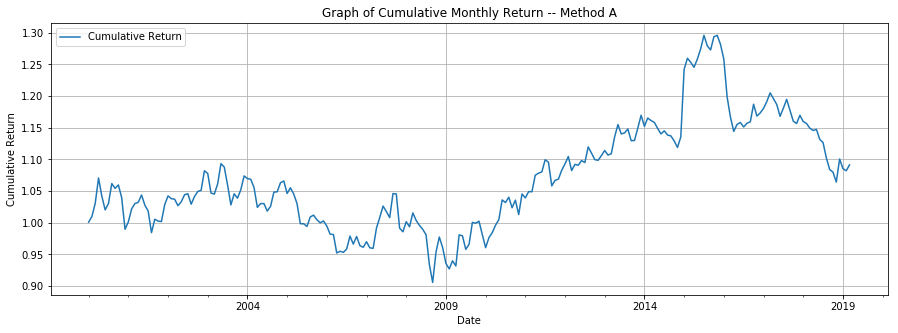

In [59]:
plt.figure(figsize=(15,5))
port_ret_A['value'].plot(label='Cumulative Return')
plt.title('Graph of Cumulative Monthly Return -- Method A')
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [60]:
port_ret_A['cummax'] = port_ret_A['value'].cummax()
port_ret_A['drawDown'] = (port_ret_A['value']/port_ret_A['cummax']-1)
portfolio_maxDD_A = port_ret_A['drawDown'].min()
print("Portfolio Maximum Drawdown: ", portfolio_maxDD_A)

Portfolio Maximum Drawdown:  -0.17880395825037942


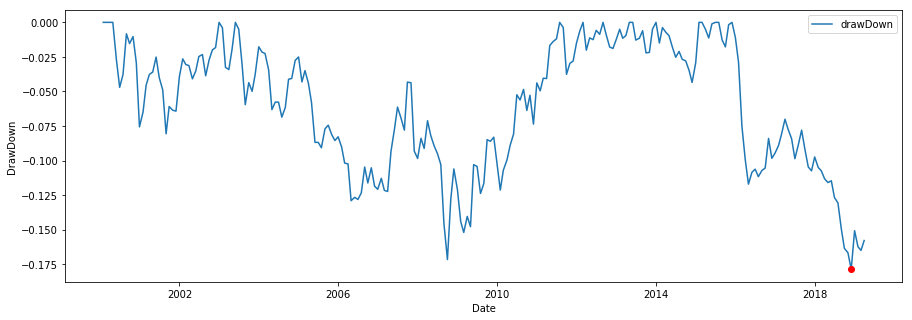

In [61]:
plt.figure(figsize=(15,5))
plt.plot(port_ret_A['drawDown'])
plt.plot(port_ret_A.loc[port_ret_A['drawDown'] == portfolio_maxDD_A]['drawDown'].index, portfolio_maxDD_A, 'ro')
plt.xlabel("Date")
plt.ylabel('DrawDown')
plt.legend()
plt.show()

## Portfolio Performance of Strategy Using Method B

In [62]:
port_ret_B = pd.DataFrame(index= weight_table_B.index)
port_ret_B['port_ret'] = np.NaN
for date in port_ret_B.index:
    port_ret_B['port_ret'].loc[date] = np.dot(return_table_B.loc[date], weight_table_B.loc[date])

In [63]:
port_ret_B.tail()

,port_ret
2018-11-30,-0.016738
2018-12-31,0.034175
2019-01-31,-0.013663
2019-02-28,-0.003211
2019-03-29,-0.000369


In [64]:
stats_B = port_ret_B['port_ret'].describe()
stats_B['Sharpe Ratio'] = stats_B['mean'] / stats_B['std'] *np.sqrt(12)
stats_B

count           231.000000
mean              0.000891
std               0.017553
min              -0.047851
25%              -0.009276
50%              -0.000213
75%               0.011038
max               0.093846
Sharpe Ratio      0.175902
Name: port_ret, dtype: float64

In [65]:
print("Annualized Return: {}".format(stats_B['mean']*12)) 
print("Annualized Risk: {}".format(stats_B['std']*np.sqrt(12)))
print("Sharpe Ratio: ", round(stats_B['Sharpe Ratio'], 4))

Annualized Return: 0.01069609003919115
Annualized Risk: 0.06080704778338589
Sharpe Ratio:  0.1759


In [66]:
port_ret_B['value'] = (1+port_ret_B['port_ret']).cumprod()

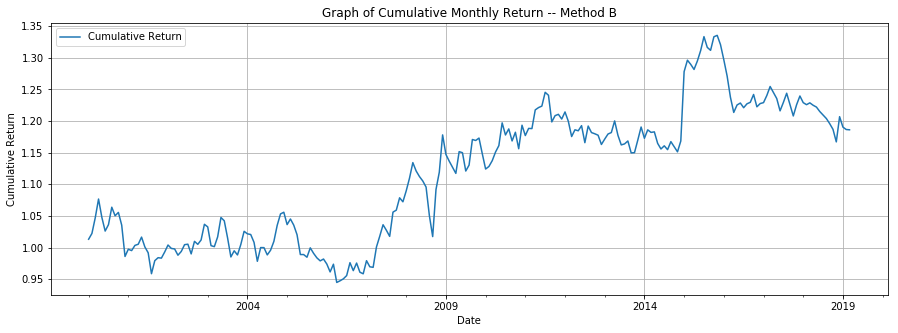

In [67]:
plt.figure(figsize=(15,5))
port_ret_B['value'].plot(label='Cumulative Return')
plt.title('Graph of Cumulative Monthly Return -- Method B')
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [68]:
port_ret_B['cummax'] = port_ret_B['value'].cummax()
port_ret_B['drawDown'] = (port_ret_B['value']/port_ret_B['cummax']-1)
portfolio_maxDD_B = port_ret_B['drawDown'].min()
print("Portfolio Maximum Drawdown: ", portfolio_maxDD_B)

Portfolio Maximum Drawdown:  -0.12618163081235045


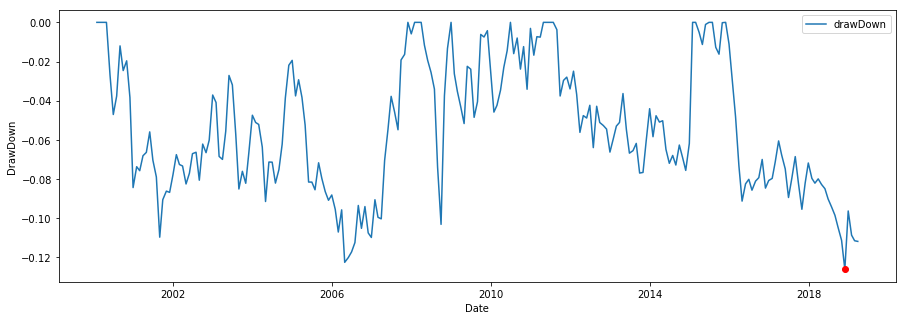

In [69]:
plt.figure(figsize=(15,5))
plt.plot(port_ret_B['drawDown'])
plt.plot(port_ret_B.loc[port_ret_B['drawDown'] == portfolio_maxDD_B]['drawDown'].index, portfolio_maxDD_B, 'ro')
plt.xlabel("Date")
plt.ylabel('DrawDown')
plt.legend()
plt.show()

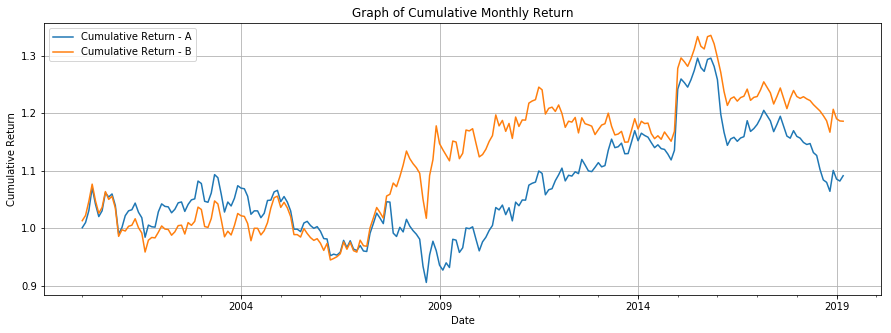

In [70]:
plt.figure(figsize=(15,5))
port_ret_A['value'].plot(label='Cumulative Return - A')
port_ret_B['value'].plot(label='Cumulative Return - B')
plt.title('Graph of Cumulative Monthly Return')
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

pred_data.iloc[23:].head(5)

plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(pred_data['AR1'].iloc[24:], ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(pred_data['AR1'].iloc[24:], ax=plt.gca(), lags=20)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(pred_data['MA1'].iloc[24:], ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(pred_data['MA1'].iloc[24:], ax=plt.gca(), lags=20)
plt.show()